In [4]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file and check the data dimension

In [0]:
#Read input file and understand the data
# "default" is my dependent variable

In [11]:
german_credit_df = pd.read_csv("german_credit.csv")
german_credit_df.shape

(1000, 21)

In [0]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [20]:
german_credit_df.dtypes

default                        int64
account_check_status          object
duration_in_month              int64
credit_history                object
purpose                       object
credit_amount                  int64
savings                       object
present_emp_since             object
installment_as_income_perc     int64
personal_status_sex           object
other_debtors                 object
present_res_since              int64
property                      object
age                            int64
other_installment_plans       object
housing                       object
credits_this_bank              int64
job                           object
people_under_maintenance       int64
telephone                     object
foreign_worker                object
dtype: object

In [48]:
#Convert non-numeric data to dummies
dummy_df = pd.get_dummies(german_credit_df, columns=['account_check_status', 'credit_history', 'purpose', 'savings', 
                                           'present_emp_since', 'personal_status_sex', 'other_debtors', 'property',
                                          'other_installment_plans', 'housing', 'job', 'telephone', 'foreign_worker'])
dummy_df.columns

Index(['default', 'duration_in_month', 'credit_amount',
       'installment_as_income_perc', 'present_res_since', 'age',
       'credits_this_bank', 'people_under_maintenance',
       'account_check_status_0 <= ... < 200 DM', 'account_check_status_< 0 DM',
       'account_check_status_>= 200 DM / salary assignments for at least 1 year',
       'account_check_status_no checking account',
       'credit_history_all credits at this bank paid back duly',
       'credit_history_critical account/ other credits existing (not at this bank)',
       'credit_history_delay in paying off in the past',
       'credit_history_existing credits paid back duly till now',
       'credit_history_no credits taken/ all credits paid back duly',
       'purpose_(vacation - does not exist?)', 'purpose_business',
       'purpose_car (new)', 'purpose_car (used)',
       'purpose_domestic appliances', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_radio/television',
       'purpose_repairs',

In [49]:
dummy_df.shape

(1000, 62)

In [50]:
#Drop the first dummy variable columns of all categorical columns to avoid dummy variable trap
dummy_drop_df = pd.get_dummies(german_credit_df, columns=['account_check_status', 'credit_history', 'purpose', 'savings', 
                                           'present_emp_since', 'personal_status_sex', 'other_debtors', 'property',
                                          'other_installment_plans', 'housing', 'job', 'telephone', 'foreign_worker'],
                         drop_first=True)
dummy_drop_df.shape

(1000, 49)

### Check for highly correlated variables but don't required any treatment for this use case

In [73]:
corr_matrix = dummy_drop_df.corr().abs()
corr_matrix
print(corr_matrix["default"].sort_values(ascending=False))

default                                                                       1.000000
account_check_status_no checking account                                      0.322436
account_check_status_< 0 DM                                                   0.258333
duration_in_month                                                             0.214927
credit_history_critical account/ other credits existing (not at this bank)    0.181713
savings_... < 100 DM                                                          0.161007
credit_amount                                                                 0.154739
credit_history_no credits taken/ all credits paid back duly                   0.144767
housing_own                                                                   0.134589
savings_unknown/ no savings account                                           0.129238
property_unknown / no property                                                0.125750
property_real estate                       

### Drop the original variables which are converted to dummy

In [58]:
german_credit_df = german_credit_df.drop(["account_check_status", "credit_history", "purpose", "savings", 
                                           "present_emp_since", "personal_status_sex", "other_debtors", "property",
                                          "other_installment_plans", "housing", "job", "telephone", "foreign_worker"],axis=1)
german_credit_df.columns

Index(['default', 'duration_in_month', 'credit_amount',
       'installment_as_income_perc', 'present_res_since', 'age',
       'credits_this_bank', 'people_under_maintenance'],
      dtype='object')

In [59]:
german_credit_df.shape

(1000, 8)

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [135]:
y = dummy_drop_df.default

from sklearn.model_selection import train_test_split
train_set, test_set, train_labels, test_labels = train_test_split(dummy_drop_df, y, test_size=0.30, random_state=1)

train_labels = train_set.pop("default")
test_labels = test_set.pop("default")

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [136]:
from sklearn.ensemble import RandomForestClassifier
RFClass = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
RFClass.fit(train_set, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
                       oob_score=False, random_state=9999, verbose=0,
                       warm_start=False)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [137]:
test_pred = RFClass.predict(test_set)
RFClass.score(test_set, test_labels)

0.7566666666666667

In [138]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(test_labels, test_pred)
conf_matrix

array([[199,  15],
       [ 58,  28]])

### Q6 Show the list of the features importance( 1 Marks)

In [139]:
pd.DataFrame(RFClass.feature_importances_, columns = ["Imp"], index = train_set.columns)

,Imp
duration_in_month,0.086042
credit_amount,0.116350
installment_as_income_perc,0.043242
present_res_since,0.038028
age,0.090328
credits_this_bank,0.021543
people_under_maintenance,0.012796
account_check_status_< 0 DM,0.033826
account_check_status_>= 200 DM / salary assignments for at least 1 year,0.009340
account_check_status_no checking account,0.049934


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [160]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [174]:
# Use below values
num_folds = 10
seed = 77

In [0]:
#Validate the Random Forest model build above using k fold

In [186]:
kfold = KFold(n_splits = num_folds, random_state=9999)
cv_results = cross_val_score(RFClass, test_set, test_labels, cv=kfold, scoring = "accuracy")

In [0]:
#Calculate Mean score

In [187]:
cv_results.mean()

0.7233333333333333

In [0]:
# Calculate score standard deviation using std()

In [188]:
cv_results.std()

0.06506407098647715

# Q8 Print the confusion matrix( 1 Marks)

In [198]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(RFClass, test_set, test_labels, cv = kfold)
conf_matrix = confusion_matrix(test_labels, y_pred)
conf_matrix

array([[199,  15],
       [ 68,  18]])

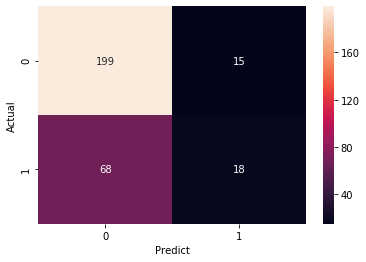

In [199]:
df_cm = pd.DataFrame(conf_matrix, columns=np.unique(test_labels), index = np.unique(test_labels))
df_cm.index.name = "Actual"
df_cm.columns.name = "Predict"
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
(2 Marks)

Out of 300 test records, the model predicted 199 + 18 = 217 records correctly using kfold CV
Correct Prediction = 72.33%

Sensitivity/Recall = 199 / (199 + 15) = 92.99%

Precision = 199/ (199 + 68) = 74.5%

[link text](https://)### Bootstrapping ( Bonus and Optional)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [0]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [0]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [0]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.6893333333333334
Standard deviation:  0.014966629547095768
